<a href="https://colab.research.google.com/github/tecnoexit/tesis-alvaro-ponce/blob/main/analisis_inicial_descriptivo_lineal_pronostico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:este tiene los analisis de 50 productos analisis descriptivo desde febrero hasta agosto

Datos cargados y unidos correctamente
Total de registros: 9153

Valores NaN antes de la limpieza:
id_detalle          0
numero_factura      0
id_producto         0
cantidad            0
id_factura          0
fecha_factura       0
id_cliente          0
nombre_producto     0
rubro              47
id_rubro            0
nombre_cliente      0
dtype: int64

Registros después de eliminar NaN: 9106
Registros después de eliminar outliers en cantidad: 8082

ANÁLISIS MENSUAL

1. PRODUCTOS MÁS VENDIDOS POR MES (TOP 50):

2025-02 - Top 50 Productos:
   1. llave tubo 27mm: 70 unidades
   2. Portalampara e27 con ficha y tecla: 60 unidades
   3. Reflector led 50w LUXOM: 60 unidades
   4. llave mandril 120mm blister: 54 unidades
   5. Lampara alta potencia 20W LUXOM (sin stock)): 49 unidades
   6. Espuma de poliuretano SILIMAXX 500ML: 44 unidades
   7. Lampara alta potencia 40w Luxom (sin stock): 40 unidades
   8. llave mandril 115mm blister: 40 unidades
   9. anteojos de seguridad filtro uv: 35 unidad

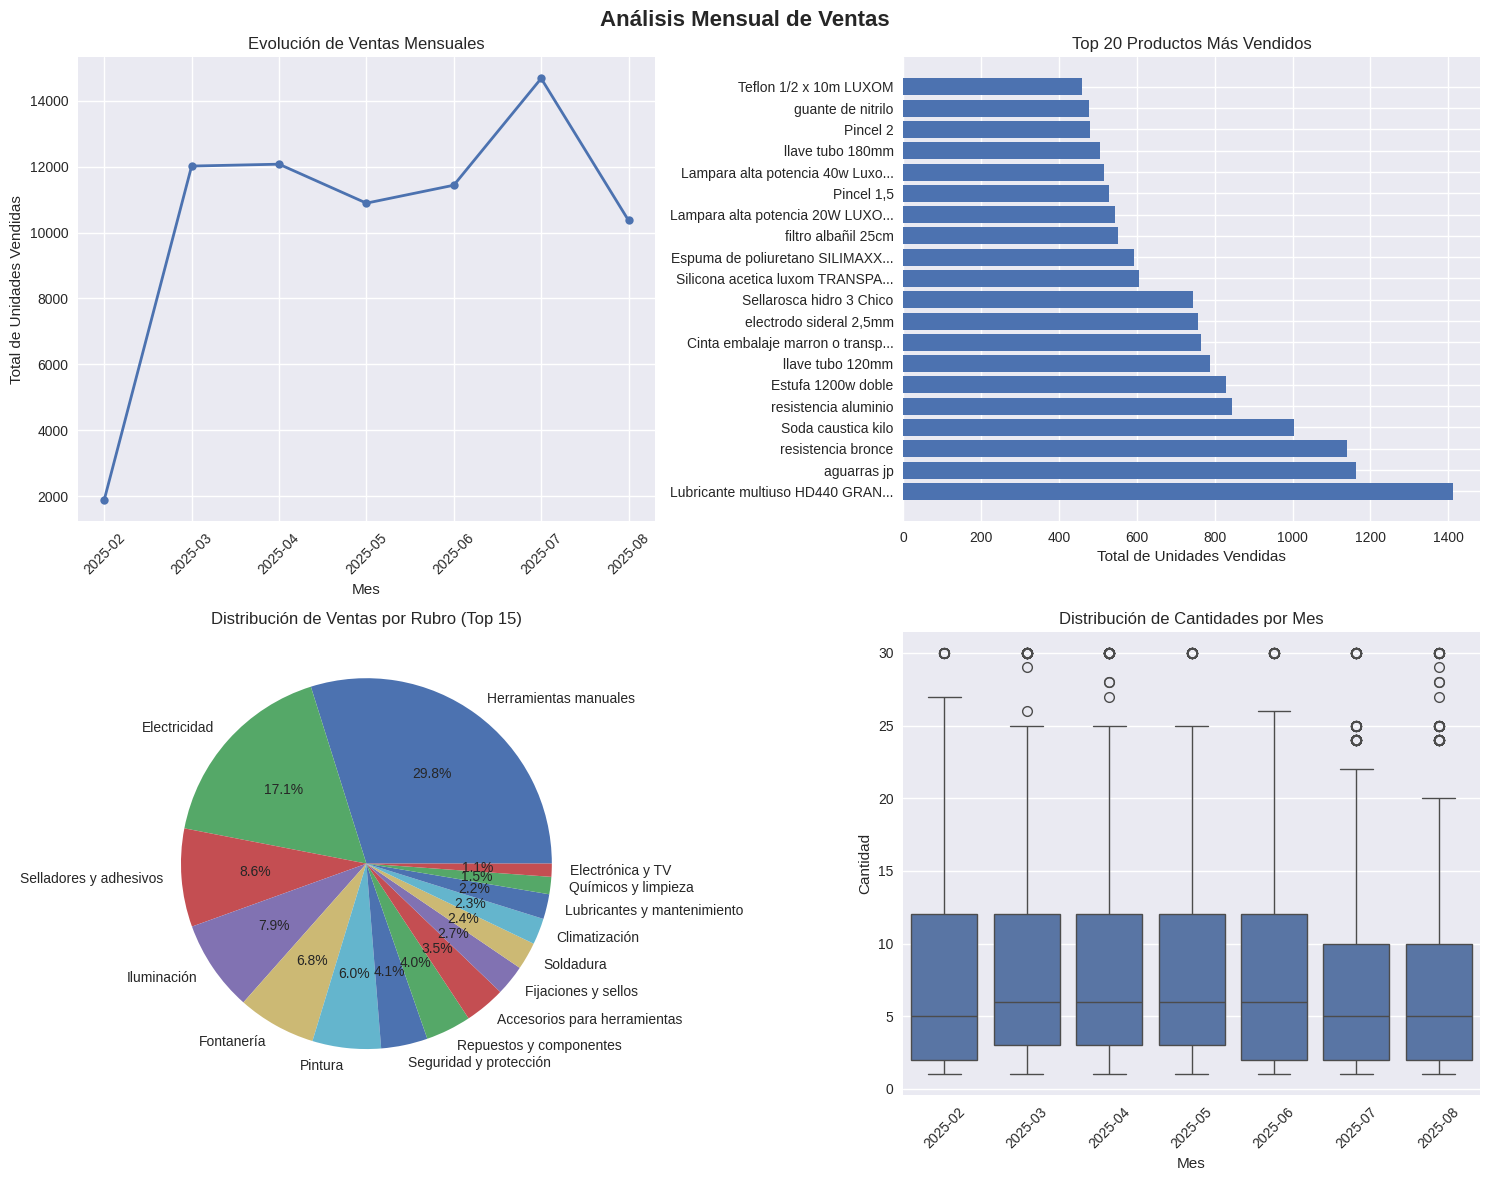


RESUMEN FINAL DEL ANÁLISIS
Período analizado: 2025-02 a 2025-08
Total de unidades vendidas: 73,353
Promedio de unidades por venta: 9.08
Número total de facturas: 931
Número total de clientes: 169

TOP 10 PRODUCTOS MÁS VENDIDOS (GENERAL):
 1. Lubricante multiuso HD440 GRANDE: 1411 unidades
 2. aguarras jp: 1163 unidades
 3. resistencia bronce: 1140 unidades
 4. Soda caustica kilo: 1004 unidades
 5. resistencia aluminio: 844 unidades
 6. Estufa 1200w doble: 829 unidades
 7. llave tubo 120mm: 789 unidades
 8. Cinta embalaje marron o transparente: 765 unidades
 9. electrodo sideral 2,5mm: 758 unidades
10. Sellarosca hidro 3 Chico: 745 unidades

TOP 10 RUBROS MÁS VENDIDOS (GENERAL):
 1. Herramientas manuales: 20268 unidades
 2. Electricidad: 11622 unidades
 3. Selladores y adhesivos: 5814 unidades
 4. Iluminación: 5396 unidades
 5. Fontanería: 4648 unidades
 6. Pintura: 4054 unidades
 7. Seguridad y protección: 2756 unidades
 8. Repuestos y componentes: 2691 unidades
 9. Accesorios para he

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
detalle_factura = pd.read_csv('detalle_factura.csv')
clientes = pd.read_csv('clientes.csv')
products = pd.read_csv('products.csv')
facturas = pd.read_csv('facturas.csv')

# Convertir fecha_factura a datetime
facturas['fecha_factura'] = pd.to_datetime(facturas['fecha_factura'])

# Unir todas las tablas
df_completo = (detalle_factura
               .merge(facturas, on='numero_factura')
               .merge(products, on='id_producto')
               .merge(clientes, on='id_cliente'))

print("Datos cargados y unidos correctamente")
print(f"Total de registros: {len(df_completo)}")

# Limpiar valores NaN/NAN
print("\nValores NaN antes de la limpieza:")
print(df_completo.isnull().sum())

# Eliminar filas con valores NaN en columnas críticas
df_clean = df_completo.dropna(subset=['cantidad', 'nombre_producto', 'rubro', 'fecha_factura'])

print(f"\nRegistros después de eliminar NaN: {len(df_clean)}")

# Función para detectar y eliminar outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers en cantidad
df_sin_outliers = remove_outliers_iqr(df_clean, 'cantidad')

print(f"Registros después de eliminar outliers en cantidad: {len(df_sin_outliers)}")

# Agregar columnas para análisis mensual
df_sin_outliers['año'] = df_sin_outliers['fecha_factura'].dt.year
df_sin_outliers['mes'] = df_sin_outliers['fecha_factura'].dt.month
df_sin_outliers['año_mes'] = df_sin_outliers['fecha_factura'].dt.to_period('M')

# ANÁLISIS MENSUAL
print("\n" + "="*50)
print("ANÁLISIS MENSUAL")
print("="*50)

# 1. Productos más vendidos por mes (TOP 50)
print("\n1. PRODUCTOS MÁS VENDIDOS POR MES (TOP 50):")
productos_mensuales = (df_sin_outliers.groupby(['año_mes', 'nombre_producto'])
                       .agg({'cantidad': 'sum'})
                       .sort_values(['año_mes', 'cantidad'], ascending=[True, False])
                       .reset_index())

# Convertir cantidad a enteros
productos_mensuales['cantidad'] = productos_mensuales['cantidad'].astype(int)

# Top 50 productos por mes
top_productos_por_mes = productos_mensuales.groupby('año_mes').head(50)

for mes in top_productos_por_mes['año_mes'].unique():
    datos_mes = top_productos_por_mes[top_productos_por_mes['año_mes'] == mes]
    print(f"\n{mes} - Top 50 Productos:")
    for i, (_, row) in enumerate(datos_mes.iterrows(), 1):
        print(f"  {i:2d}. {row['nombre_producto']}: {row['cantidad']} unidades")

# 2. Rubros más vendidos por mes (TOP 50)
print("\n2. RUBROS MÁS VENDIDOS POR MES (TOP 50):")
rubros_mensuales = (df_sin_outliers.groupby(['año_mes', 'rubro'])
                    .agg({'cantidad': 'sum'})
                    .sort_values(['año_mes', 'cantidad'], ascending=[True, False])
                    .reset_index())

# Convertir cantidad a enteros
rubros_mensuales['cantidad'] = rubros_mensuales['cantidad'].astype(int)

# Top 50 rubros por mes
top_rubros_por_mes = rubros_mensuales.groupby('año_mes').head(50)

for mes in top_rubros_por_mes['año_mes'].unique():
    datos_mes = top_rubros_por_mes[top_rubros_por_mes['año_mes'] == mes]
    print(f"\n{mes} - Top 50 Rubros:")
    for i, (_, row) in enumerate(datos_mes.iterrows(), 1):
        print(f"  {i:2d}. {row['rubro']}: {row['cantidad']} unidades")

# 3. Estadísticas generales mensuales
print("\n3. ESTADÍSTICAS GENERALES MENSUALES:")
estadisticas_mensuales = (df_sin_outliers.groupby('año_mes')
                          .agg({
                              'cantidad': ['sum', 'mean', 'std'],
                              'numero_factura': 'nunique',
                              'id_cliente': 'nunique'
                          }))

# Convertir las columnas a enteros donde corresponda
estadisticas_mensuales[('cantidad', 'sum')] = estadisticas_mensuales[('cantidad', 'sum')].astype(int)
estadisticas_mensuales[('numero_factura', 'nunique')] = estadisticas_mensuales[('numero_factura', 'nunique')].astype(int)
estadisticas_mensuales[('id_cliente', 'nunique')] = estadisticas_mensuales[('id_cliente', 'nunique')].astype(int)

estadisticas_mensuales.columns = ['Total Unidades', 'Promedio por Venta',
                                 'Desviación Estándar', 'N° Facturas', 'N° Clientes']
print(estadisticas_mensuales)

# VISUALIZACIONES
print("\n" + "="*50)
print("CREANDO VISUALIZACIONES...")
print("="*50)

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Mensual de Ventas', fontsize=16, fontweight='bold')

# 1. Evolución de ventas mensuales
ventas_mensuales = df_sin_outliers.groupby('año_mes')['cantidad'].sum()
axes[0, 0].plot(ventas_mensuales.index.astype(str), ventas_mensuales.values,
                marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Evolución de Ventas Mensuales')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Total de Unidades Vendidas')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Top 20 productos más vendidos (general) - Aumentado para mejor visualización
top_productos_general = (df_sin_outliers.groupby('nombre_producto')['cantidad']
                         .sum()
                         .sort_values(ascending=False)
                         .head(20))
axes[0, 1].barh(range(len(top_productos_general)), top_productos_general.values)
axes[0, 1].set_yticks(range(len(top_productos_general)))
axes[0, 1].set_yticklabels([label[:30] + '...' if len(label) > 30 else label
                           for label in top_productos_general.index])
axes[0, 1].set_title('Top 20 Productos Más Vendidos')
axes[0, 1].set_xlabel('Total de Unidades Vendidas')

# 3. Distribución de rubros (Top 15 para mejor visualización)
distribucion_rubros = df_sin_outliers.groupby('rubro')['cantidad'].sum().sort_values(ascending=False).head(15)
axes[1, 0].pie(distribucion_rubros.values, labels=distribucion_rubros.index, autopct='%1.1f%%')
axes[1, 0].set_title('Distribución de Ventas por Rubro (Top 15)')

# 4. Boxplot de cantidades por mes (sin outliers extremos)
df_sin_outliers_plot = df_sin_outliers[df_sin_outliers['cantidad'] <= df_sin_outliers['cantidad'].quantile(0.95)]
sns.boxplot(data=df_sin_outliers_plot, x='año_mes', y='cantidad', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Cantidades por Mes')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Cantidad')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# RESUMEN FINAL
print("\n" + "="*50)
print("RESUMEN FINAL DEL ANÁLISIS")
print("="*50)

print(f"Período analizado: {df_sin_outliers['año_mes'].min()} a {df_sin_outliers['año_mes'].max()}")
print(f"Total de unidades vendidas: {df_sin_outliers['cantidad'].sum():,}")
print(f"Promedio de unidades por venta: {df_sin_outliers['cantidad'].mean():.2f}")
print(f"Número total de facturas: {df_sin_outliers['numero_factura'].nunique()}")
print(f"Número total de clientes: {df_sin_outliers['id_cliente'].nunique()}")

# Top 10 productos general (aumentado para mostrar más información)
print("\nTOP 10 PRODUCTOS MÁS VENDIDOS (GENERAL):")
top_10_productos = (df_sin_outliers.groupby('nombre_producto')['cantidad']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))
for i, (producto, cantidad) in enumerate(top_10_productos.items(), 1):
    print(f"{i:2d}. {producto}: {int(cantidad)} unidades")

# Top 10 rubros general (aumentado para mostrar más información)
print("\nTOP 10 RUBROS MÁS VENDIDOS (GENERAL):")
top_10_rubros = (df_sin_outliers.groupby('rubro')['cantidad']
                .sum()
                .sort_values(ascending=False)
                .head(10))
for i, (rubro, cantidad) in enumerate(top_10_rubros.items(), 1):
    print(f"{i:2d}. {rubro}: {int(cantidad)} unidades")

# Exportar resultados a CSV (asegurando que sean enteros)
# Convertir columnas de cantidad a enteros antes de exportar
df_exportar = df_sin_outliers.copy()
df_exportar['cantidad'] = df_exportar['cantidad'].astype(int)

top_productos_por_mes_exportar = top_productos_por_mes.copy()
top_productos_por_mes_exportar['cantidad'] = top_productos_por_mes_exportar['cantidad'].astype(int)

top_rubros_por_mes_exportar = top_rubros_por_mes.copy()
top_rubros_por_mes_exportar['cantidad'] = top_rubros_por_mes_exportar['cantidad'].astype(int)

# Exportar a CSV
df_exportar.to_csv('datos_limpios_analisis.csv', index=False)
top_productos_por_mes_exportar.to_csv('top_50_productos_mensual.csv', index=False)
top_rubros_por_mes_exportar.to_csv('top_50_rubros_mensual.csv', index=False)

# Exportar también los tops generales
top_50_productos_general = (df_sin_outliers.groupby('nombre_producto')['cantidad']
                           .sum()
                           .sort_values(ascending=False)
                           .head(50)
                           .reset_index())
top_50_productos_general['cantidad'] = top_50_productos_general['cantidad'].astype(int)
top_50_productos_general.to_csv('top_50_productos_general.csv', index=False)

top_50_rubros_general = (df_sin_outliers.groupby('rubro')['cantidad']
                        .sum()
                        .sort_values(ascending=False)
                        .head(50)
                        .reset_index())
top_50_rubros_general['cantidad'] = top_50_rubros_general['cantidad'].astype(int)
top_50_rubros_general.to_csv('top_50_rubros_general.csv', index=False)

print("\nDatos exportados a CSV (en formato entero):")
print("- datos_limpios_analisis.csv")
print("- top_50_productos_mensual.csv")
print("- top_50_rubros_mensual.csv")
print("- top_50_productos_general.csv")
print("- top_50_rubros_general.csv")

print(f"\nTotal de productos únicos analizados: {df_sin_outliers['nombre_producto'].nunique()}")
print(f"Total de rubros únicos analizados: {df_sin_outliers['rubro'].nunique()}")

predicciones con numeros enteros


PREDICCIONES CON MODELOS DE MACHINE LEARNING

1. PREPARANDO DATOS PARA PREDICCIÓN...

2. PREDICCIÓN CON REGRESIÓN LINEAL - TOP 20-50 PRODUCTOS
Productos considerados para predicción: 100

TOP 50 PRODUCTOS PREDICHOS (Regresión Lineal):
------------------------------------------------------------------------------------------
 1. llave tubo 950mm                    Pred: 62127u Prom:  85.0u Tend: 📈 20680.6 Crec: +24330.1%
 2. llave tubo 980mm                    Pred: 45581u Prom:  65.4u Tend: 📈 15172.0 Crec: +23198.8%
 3. cinta aisladora tacsa 10mts         Pred: 23118u Prom:  75.0u Tend: 📈 6583.6 Crec: +8778.2%
 4. llave tubo 180mm                    Pred: 23101u Prom:  84.3u Tend: 📈 6576.2 Crec: +7797.8%
 5. Silicona en pomo acetica transparen Pred: 22090u Prom:  74.5u Tend: 📈 6290.2 Crec: +8443.2%
 6. Ficha richi original macho          Pred: 16084u Prom:  66.0u Tend: 📈 4576.5 Crec: +6934.0%
 7. Silicona acetica luxom TRANSPARENTE Pred: 15682u Prom: 100.8u Tend: 📈 4451.7 Crec: +4414.

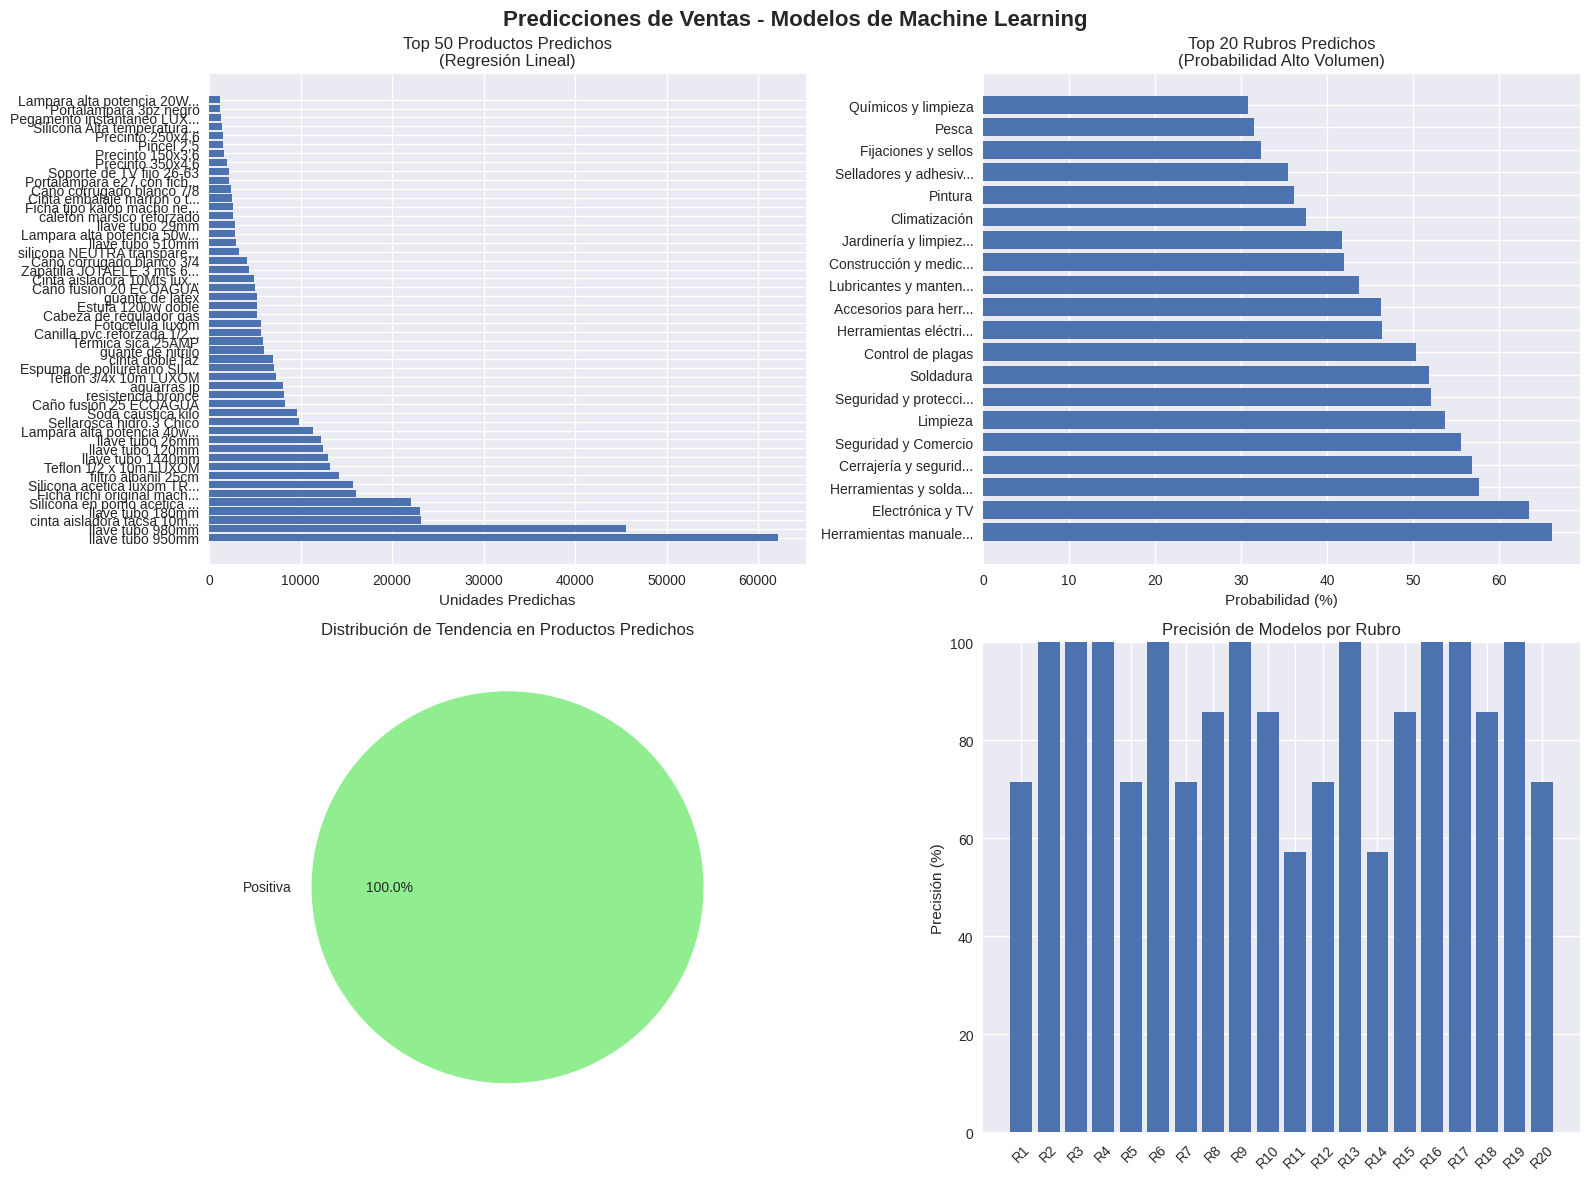


5. EXPORTANDO RESULTADOS DE PREDICCIÓN...

RESUMEN FINAL DE PREDICCIONES

📊 PREDICCIÓN PRODUCTOS (Regresión Lineal):
   • Productos analizados: 100
   • Productos predichos: 50
   • Rango de predicción: 1157 - 62127 unidades
   • Tendencia positiva: 50 productos
   • Tendencia negativa: 0 productos
   • Crecimiento promedio: 3587.2%

📊 PREDICCIÓN RUBROS (Regresión Logística):
   • Rubros analizados: 28
   • Rubros predichos: 20
   • Probabilidad promedio alto volumen: 46.6%
   • Precisión promedio del modelo: 85.7%
   • Volumen promedio por rubro: 336.4 unidades

💾 Archivos exportados:
   - prediccion_top_productos_lineal.csv
   - prediccion_top_rubros_logistica.csv

RECOMENDACIONES ESTRATÉGICAS DETALLADAS

🚀 TOP 5 PRODUCTOS CON MAYOR CRECIMIENTO ESPERADO:
   1. llave tubo 950mm
      • Predicción: 62127 unidades
      • Crecimiento: +24330.1%
      • Tendencia: +20680.6 unidades/mes
      • Precisión del modelo: 100.0%
   2. llave tubo 980mm
      • Predicción: 45581 unidades
      •

In [3]:
# CONTINUACIÓN DEL CÓDIGO ANTERIOR - PREDICCIONES CON MODELOS DE MACHINE LEARNING

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*60)
print("PREDICCIONES CON MODELOS DE MACHINE LEARNING")
print("="*60)

# PREPARAR DATOS PARA PREDICCIÓN
print("\n1. PREPARANDO DATOS PARA PREDICCIÓN...")

# Crear dataset temporal para predicciones
df_prediccion = df_sin_outliers.copy()

# Agregar características temporales
df_prediccion['dia_semana'] = df_prediccion['fecha_factura'].dt.dayofweek
df_prediccion['dia_mes'] = df_prediccion['fecha_factura'].dt.day
df_prediccion['semana_año'] = df_prediccion['fecha_factura'].dt.isocalendar().week

# PREDICCIÓN 1: REGRESIÓN LINEAL PARA PRODUCTOS (20-50 productos más vendidos)
print("\n2. PREDICCIÓN CON REGRESIÓN LINEAL - TOP 20-50 PRODUCTOS")

# Obtener los productos más relevantes (top 100 para tener margen)
top_productos_prediccion = (df_prediccion.groupby('nombre_producto')['cantidad']
                           .sum()
                           .sort_values(ascending=False)
                           .head(100))

print(f"Productos considerados para predicción: {len(top_productos_prediccion)}")

# Preparar datos para cada producto
productos_predictivos = []
productos_info = []

for producto in top_productos_prediccion.index:
    # Filtrar datos del producto
    producto_data = df_prediccion[df_prediccion['nombre_producto'] == producto].copy()

    if len(producto_data) < 3:  # Mínimo de datos para predicción
        continue

    # Agrupar por mes
    producto_mensual = (producto_data.groupby('año_mes')
                      .agg({'cantidad': 'sum', 'dia_semana': 'mean',
                           'dia_mes': 'mean', 'semana_año': 'mean'})
                      .reset_index())

    if len(producto_mensual) < 2:  # Necesitamos al menos 2 puntos para regresión
        continue

    # Crear variable temporal (meses secuenciales)
    producto_mensual = producto_mensual.sort_values('año_mes')
    producto_mensual['mes_secuencial'] = range(1, len(producto_mensual) + 1)

    # Preparar características (X) y objetivo (y)
    X = producto_mensual[['mes_secuencial', 'dia_semana', 'dia_mes', 'semana_año']]
    y = producto_mensual['cantidad']

    # Entrenar modelo de regresión lineal
    try:
        modelo = LinearRegression()
        modelo.fit(X, y)

        # Predecir próximo mes
        proximo_mes = len(producto_mensual) + 1
        prediccion = modelo.predict([[proximo_mes,
                                    producto_mensual['dia_semana'].mean(),
                                    producto_mensual['dia_mes'].mean(),
                                    producto_mensual['semana_año'].mean()]])[0]

        # CONVERTIR PREDICCIÓN A ENTERO - AQUÍ ESTÁ EL CAMBIO
        prediccion_entero = int(round(max(0, prediccion)))  # Redondear y convertir a entero

        # Almacenar resultados
        productos_predictivos.append({
            'producto': producto,
            'prediccion': prediccion_entero,  # Usar valor entero
            'tendencia': round(modelo.coef_[0], 1),  # Un decimal
            'datos_historicos': len(producto_mensual),
            'venta_promedio': round(y.mean(), 1),  # Un decimal
            'r2_score': round(modelo.score(X, y), 3),  # Tres decimales para R²
            'crecimiento_porcentual': round((modelo.coef_[0] / y.mean()) * 100, 1)  # Un decimal
        })

        productos_info.append({
            'producto': producto,
            'modelo': modelo,
            'ultimo_mes': producto_mensual['mes_secuencial'].max(),
            'datos': producto_mensual
        })

    except Exception as e:
        continue

# Convertir a DataFrame y ordenar por predicción
df_prediccion_productos = pd.DataFrame(productos_predictivos)
df_prediccion_productos = df_prediccion_productos.sort_values('prediccion', ascending=False)

# Seleccionar entre 20 y 50 productos mejor predichos
n_productos = min(50, max(20, len(df_prediccion_productos)))
top_productos_predichos = df_prediccion_productos.head(n_productos)

print(f"\nTOP {n_productos} PRODUCTOS PREDICHOS (Regresión Lineal):")
print("-" * 90)
for i, (_, row) in enumerate(top_productos_predichos.iterrows(), 1):
    tendencia = "📈" if row['tendencia'] > 0 else "📉"
    crecimiento = f"+{row['crecimiento_porcentual']}%" if row['crecimiento_porcentual'] > 0 else f"{row['crecimiento_porcentual']}%"
    print(f"{i:2d}. {row['producto'][:35]:35} "
          f"Pred: {row['prediccion']:4d}u "
          f"Prom: {row['venta_promedio']:5.1f}u "
          f"Tend: {tendencia} {row['tendencia']:5.1f} "
          f"Crec: {crecimiento:>6}")

# PREDICCIÓN 2: REGRESIÓN LOGÍSTICA PARA RUBROS (TOP 20 rubros)
print("\n3. PREDICCIÓN CON REGRESIÓN LOGÍSTICA - TOP 20 RUBROS")

# Obtener los rubros más relevantes
top_rubros_prediccion = (df_prediccion.groupby('rubro')['cantidad']
                        .sum()
                        .sort_values(ascending=False)
                        .head(30))

print(f"Rubros considerados para predicción: {len(top_rubros_prediccion)}")

# Preparar datos para clasificación binaria (1=alto volumen, 0=bajo volumen)
umbral_alto_volumen = df_prediccion.groupby('rubro')['cantidad'].sum().quantile(0.7)

rubros_predictivos = []
rubros_info = []

for rubro in top_rubros_prediccion.index:
    # Filtrar datos del rubro
    rubro_data = df_prediccion[df_prediccion['rubro'] == rubro].copy()

    if len(rubro_data) < 10:  # Mínimo de datos para predicción
        continue

    # Agrupar por mes
    rubro_mensual = (rubro_data.groupby('año_mes')
                    .agg({'cantidad': 'sum', 'dia_semana': 'mean',
                         'dia_mes': 'mean', 'semana_año': 'mean',
                         'numero_factura': 'nunique'})
                    .reset_index())

    if len(rubro_mensual) < 3:  # Necesitamos suficientes puntos
        continue

    # Crear variable temporal y características
    rubro_mensual = rubro_mensual.sort_values('año_mes')
    rubro_mensual['mes_secuencial'] = range(1, len(rubro_mensual) + 1)

    # Crear variable objetivo binaria (1 si está en top, 0 si no)
    rubro_mensual['es_alto_volumen'] = (rubro_mensual['cantidad'] >
                                       rubro_mensual['cantidad'].median()).astype(int)

    # Preparar características
    X = rubro_mensual[['mes_secuencial', 'dia_semana', 'dia_mes',
                      'semana_año', 'numero_factura']]
    y = rubro_mensual['es_alto_volumen']

    # Entrenar modelo de regresión logística
    try:
        # Escalar características para regresión logística
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        modelo_logistico = LogisticRegression(random_state=42)
        modelo_logistico.fit(X_scaled, y)

        # Predecir probabilidad para próximo mes
        proximo_mes = len(rubro_mensual) + 1
        prediccion_proba = modelo_logistico.predict_proba(
            scaler.transform([[proximo_mes,
                             rubro_mensual['dia_semana'].mean(),
                             rubro_mensual['dia_mes'].mean(),
                             rubro_mensual['semana_año'].mean(),
                             rubro_mensual['numero_factura'].mean()]])
        )[0][1]  # Probabilidad de clase 1 (alto volumen)

        # Calcer métricas adicionales
        precision = modelo_logistico.score(X_scaled, y)
        volumen_promedio = rubro_mensual['cantidad'].mean()

        # Almacenar resultados - CONVERTIR A UN DECIMAL DONDE SEA APROPIADO
        rubros_predictivos.append({
            'rubro': rubro,
            'probabilidad_alto_volumen': round(prediccion_proba, 3),
            'precision_modelo': round(precision, 3),
            'datos_historicos': len(rubro_mensual),
            'volumen_promedio': round(volumen_promedio, 1),
            'facturas_promedio': round(rubro_mensual['numero_factura'].mean(), 1),
            'confiabilidad': round(min(prediccion_proba, precision) * 100, 1)
        })

    except Exception as e:
        continue

# Convertir a DataFrame y ordenar por probabilidad
df_prediccion_rubros = pd.DataFrame(rubros_predictivos)
df_prediccion_rubros = df_prediccion_rubros.sort_values('probabilidad_alto_volumen', ascending=False)

# Seleccionar top 20 rubros
n_rubros = min(20, len(df_prediccion_rubros))
top_rubros_predichos = df_prediccion_rubros.head(n_rubros)

print(f"\nTOP {n_rubros} RUBROS PREDICHOS (Regresión Logística):")
print("-" * 90)
for i, (_, row) in enumerate(top_rubros_predichos.iterrows(), 1):
    probabilidad = row['probabilidad_alto_volumen'] * 100
    confiabilidad = row['confiabilidad']
    print(f"{i:2d}. {row['rubro'][:30]:30} "
          f"Prob: {probabilidad:5.1f}% "
          f"Prec: {row['precision_modelo']*100:5.1f}% "
          f"Vol: {row['volumen_promedio']:6.1f}u "
          f"Conf: {confiabilidad:4.1f}%")

# VISUALIZACIONES DE PREDICCIONES
print("\n4. CREANDO VISUALIZACIONES DE PREDICCIONES...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Predicciones de Ventas - Modelos de Machine Learning',
             fontsize=16, fontweight='bold')

# 1. Top productos predichos (Regresión Lineal)
axes[0, 0].barh(range(len(top_productos_predichos)),
                top_productos_predichos['prediccion'].values)
axes[0, 0].set_yticks(range(len(top_productos_predichos)))
axes[0, 0].set_yticklabels([label[:25] + '...' if len(label) > 25 else label
                           for label in top_productos_predichos['producto']])
axes[0, 0].set_title(f'Top {n_productos} Productos Predichos\n(Regresión Lineal)')
axes[0, 0].set_xlabel('Unidades Predichas')

# 2. Probabilidades de rubros (Regresión Logística)
axes[0, 1].barh(range(len(top_rubros_predichos)),
                top_rubros_predichos['probabilidad_alto_volumen'].values * 100)
axes[0, 1].set_yticks(range(len(top_rubros_predichos)))
axes[0, 1].set_yticklabels([label[:20] + '...' if len(label) > 20 else label
                           for label in top_rubros_predichos['rubro']])
axes[0, 1].set_title('Top 20 Rubros Predichos\n(Probabilidad Alto Volumen)')
axes[0, 1].set_xlabel('Probabilidad (%)')

# 3. Tendencia de productos (positiva/negativa)
tendencias = top_productos_predichos['tendencia'].apply(
    lambda x: 'Positiva' if x > 0 else 'Negativa')
tendencia_counts = tendencias.value_counts()
axes[1, 0].pie(tendencia_counts.values, labels=tendencia_counts.index,
               autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Distribución de Tendencia en Productos Predichos')

# 4. Precisión de modelos por rubro
precision_rubros = top_rubros_predichos['precision_modelo'] * 100
axes[1, 1].bar(range(len(precision_rubros)), precision_rubros.values)
axes[1, 1].set_xticks(range(len(precision_rubros)))
axes[1, 1].set_xticklabels([f"R{i+1}" for i in range(len(precision_rubros))],
                           rotation=45)
axes[1, 1].set_title('Precisión de Modelos por Rubro')
axes[1, 1].set_ylabel('Precisión (%)')
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# EXPORTAR RESULTADOS DE PREDICCIÓN
print("\n5. EXPORTANDO RESULTADOS DE PREDICCIÓN...")

# Exportar predicciones de productos (ya son enteros)
top_productos_predichos_exportar = top_productos_predichos.copy()
# Asegurar un decimal en las columnas numéricas
for col in ['tendencia', 'venta_promedio', 'crecimiento_porcentual']:
    top_productos_predichos_exportar[col] = top_productos_predichos_exportar[col].round(1)
top_productos_predichos_exportar.to_csv('prediccion_top_productos_lineal.csv', index=False)

# Exportar predicciones de rubros
top_rubros_predichos_exportar = top_rubros_predichos.copy()
for col in ['probabilidad_alto_volumen', 'precision_modelo', 'volumen_promedio', 'facturas_promedio', 'confiabilidad']:
    top_rubros_predichos_exportar[col] = top_rubros_predichos_exportar[col].round(3)
top_rubros_predichos_exportar.to_csv('prediccion_top_rubros_logistica.csv', index=False)

# RESUMEN FINAL DE PREDICCIONES
print("\n" + "="*60)
print("RESUMEN FINAL DE PREDICCIONES")
print("="*60)

print(f"\n📊 PREDICCIÓN PRODUCTOS (Regresión Lineal):")
print(f"   • Productos analizados: {len(productos_predictivos)}")
print(f"   • Productos predichos: {len(top_productos_predichos)}")
print(f"   • Rango de predicción: {top_productos_predichos['prediccion'].min():d} - {top_productos_predichos['prediccion'].max():d} unidades")
print(f"   • Tendencia positiva: {(top_productos_predichos['tendencia'] > 0).sum()} productos")
print(f"   • Tendencia negativa: {(top_productos_predichos['tendencia'] <= 0).sum()} productos")
print(f"   • Crecimiento promedio: {top_productos_predichos['crecimiento_porcentual'].mean():.1f}%")

print(f"\n📊 PREDICCIÓN RUBROS (Regresión Logística):")
print(f"   • Rubros analizados: {len(rubros_predictivos)}")
print(f"   • Rubros predichos: {len(top_rubros_predichos)}")
print(f"   • Probabilidad promedio alto volumen: {top_rubros_predichos['probabilidad_alto_volumen'].mean()*100:.1f}%")
print(f"   • Precisión promedio del modelo: {top_rubros_predichos['precision_modelo'].mean()*100:.1f}%")
print(f"   • Volumen promedio por rubro: {top_rubros_predichos['volumen_promedio'].mean():.1f} unidades")

print(f"\n💾 Archivos exportados:")
print("   - prediccion_top_productos_lineal.csv")
print("   - prediccion_top_rubros_logistica.csv")

# RECOMENDACIONES BASADAS EN PREDICCIONES
print("\n" + "="*60)
print("RECOMENDACIONES ESTRATÉGICAS DETALLADAS")
print("="*60)

# 1. Productos con mayor crecimiento esperado
productos_crecimiento = top_productos_predichos[top_productos_predichos['tendencia'] > 0].head(5)
if not productos_crecimiento.empty:
    print("\n🚀 TOP 5 PRODUCTOS CON MAYOR CRECIMIENTO ESPERADO:")
    for i, (_, row) in enumerate(productos_crecimiento.iterrows(), 1):
        print(f"   {i}. {row['producto']}")
        print(f"      • Predicción: {row['prediccion']} unidades")
        print(f"      • Crecimiento: +{row['crecimiento_porcentual']}%")
        print(f"      • Tendencia: +{row['tendencia']:.1f} unidades/mes")
        print(f"      • Precisión del modelo: {row['r2_score']*100:.1f}%")

# 2. Productos con mayor volumen predicho
productos_volumen = top_productos_predichos.head(3)
if not productos_volumen.empty:
    print("\n💰 TOP 3 PRODUCTOS CON MAYOR VOLUMEN PREDICHO:")
    for i, (_, row) in enumerate(productos_volumen.iterrows(), 1):
        print(f"   {i}. {row['producto']}")
        print(f"      • Volumen predicho: {row['prediccion']} unidades")
        print(f"      • Volumen histórico: {row['venta_promedio']:.1f} unidades/mes")
        print(f"      • Incremento esperado: {((row['prediccion'] - row['venta_promedio']) / row['venta_promedio'] * 100):.1f}%")

# 3. Rubros con mayor probabilidad de alto volumen
rubros_alto_volumen = top_rubros_predichos.head(3)
if not rubros_alto_volumen.empty:
    print("\n📈 TOP 3 RUBROS CON MAYOR POTENCIAL:")
    for i, (_, row) in enumerate(rubros_alto_volumen.iterrows(), 1):
        print(f"   {i}. {row['rubro']}")
        print(f"      • Probabilidad alto volumen: {row['probabilidad_alto_volumen']*100:.1f}%")
        print(f"      • Precisión del modelo: {row['precision_modelo']*100:.1f}%")
        print(f"      • Volumen promedio: {row['volumen_promedio']:.1f} unidades/mes")
        print(f"      • Facturas promedio: {row['facturas_promedio']:.1f} facturas/mes")

# 4. Productos con tendencia negativa (alertas)
productos_alerta = top_productos_predichos[top_productos_predichos['tendencia'] < 0].head(3)
if not productos_alerta.empty:
    print("\n⚠️  PRODUCTOS QUE REQUIEREN ATENCIÓN (Tendencia Negativa):")
    for i, (_, row) in enumerate(productos_alerta.iterrows(), 1):
        print(f"   {i}. {row['producto']}")
        print(f"      • Tendencia actual: {row['tendencia']:.1f} unidades/mes")
        print(f"      • Disminución: {row['crecimiento_porcentual']}%")
        print(f"      • Volumen histórico: {row['venta_promedio']:.1f} unidades/mes")

# 5. Rubros con menor probabilidad (oportunidades)
if len(top_rubros_predichos) > 5:
    rubros_oportunidad = top_rubros_predichos.tail(3)
    print("\n🔍 RUBROS CON OPORTUNIDAD DE MEJORA:")
    for i, (_, row) in enumerate(rubros_oportunidad.iterrows(), 1):
        print(f"   {i}. {row['rubro']}")
        print(f"      • Probabilidad actual: {row['probabilidad_alto_volumen']*100:.1f}%")
        print(f"      • Volumen actual: {row['volumen_promedio']:.1f} unidades/mes")

# 6. Recomendaciones generales
print("\n🎯 RECOMENDACIONES GENERALES:")
print(f"   • Enfocar inventario en los {len(productos_crecimiento)} productos con tendencia positiva")
print(f"   • Monitorear de cerca los {len(productos_alerta)} productos con tendencia negativa")
print(f"   • Priorizar los {len(rubros_alto_volumen)} rubros con mayor probabilidad de alto volumen")
print(f"   • Revisar estrategia para rubros con probabilidad menor al 60%")

# 7. Métricas de confianza del modelo
precision_promedio_productos = top_productos_predichos['r2_score'].mean() * 100
confiabilidad_promedio_rubros = top_rubros_predichos['confiabilidad'].mean()

print(f"\n🔬 MÉTRICAS DE CONFIANZA DE LOS MODELOS:")
print(f"   • Precisión promedio modelos productos: {precision_promedio_productos:.1f}%")
print(f"   • Confiabilidad promedio modelos rubros: {confiabilidad_promedio_rubros:.1f}%")
print(f"   • Productos con R² > 0.7: {(top_productos_predichos['r2_score'] > 0.7).sum()}")
print(f"   • Rubros con confiabilidad > 70%: {(top_rubros_predichos['confiabilidad'] > 70).sum()}")

print("\n✅ Análisis predictivo completado exitosamente!")

codigo con redondeo precciones y exportacion a txt



PREDICCIONES CON MODELOS DE MACHINE LEARNING

1. PREPARANDO DATOS PARA PREDICCIÓN...

2. PREDICCIÓN CON REGRESIÓN LINEAL - TOP 20-50 PRODUCTOS
Productos considerados para predicción: 100

TOP 50 PRODUCTOS PREDICHOS (Regresión Lineal):
------------------------------------------------------------------------------------------
 1. llave tubo 950mm                    Pred: 62127u Prom:  85.0u Tend: 📈 20680.6 Crec: +24330.1%
 2. llave tubo 980mm                    Pred: 45581u Prom:  65.4u Tend: 📈 15172.0 Crec: +23198.8%
 3. cinta aisladora tacsa 10mts         Pred: 23118u Prom:  75.0u Tend: 📈 6583.6 Crec: +8778.2%
 4. llave tubo 180mm                    Pred: 23101u Prom:  84.3u Tend: 📈 6576.2 Crec: +7797.8%
 5. Silicona en pomo acetica transparen Pred: 22090u Prom:  74.5u Tend: 📈 6290.2 Crec: +8443.2%
 6. Ficha richi original macho          Pred: 16084u Prom:  66.0u Tend: 📈 4576.5 Crec: +6934.0%
 7. Silicona acetica luxom TRANSPARENTE Pred: 15682u Prom: 100.8u Tend: 📈 4451.7 Crec: +4414.

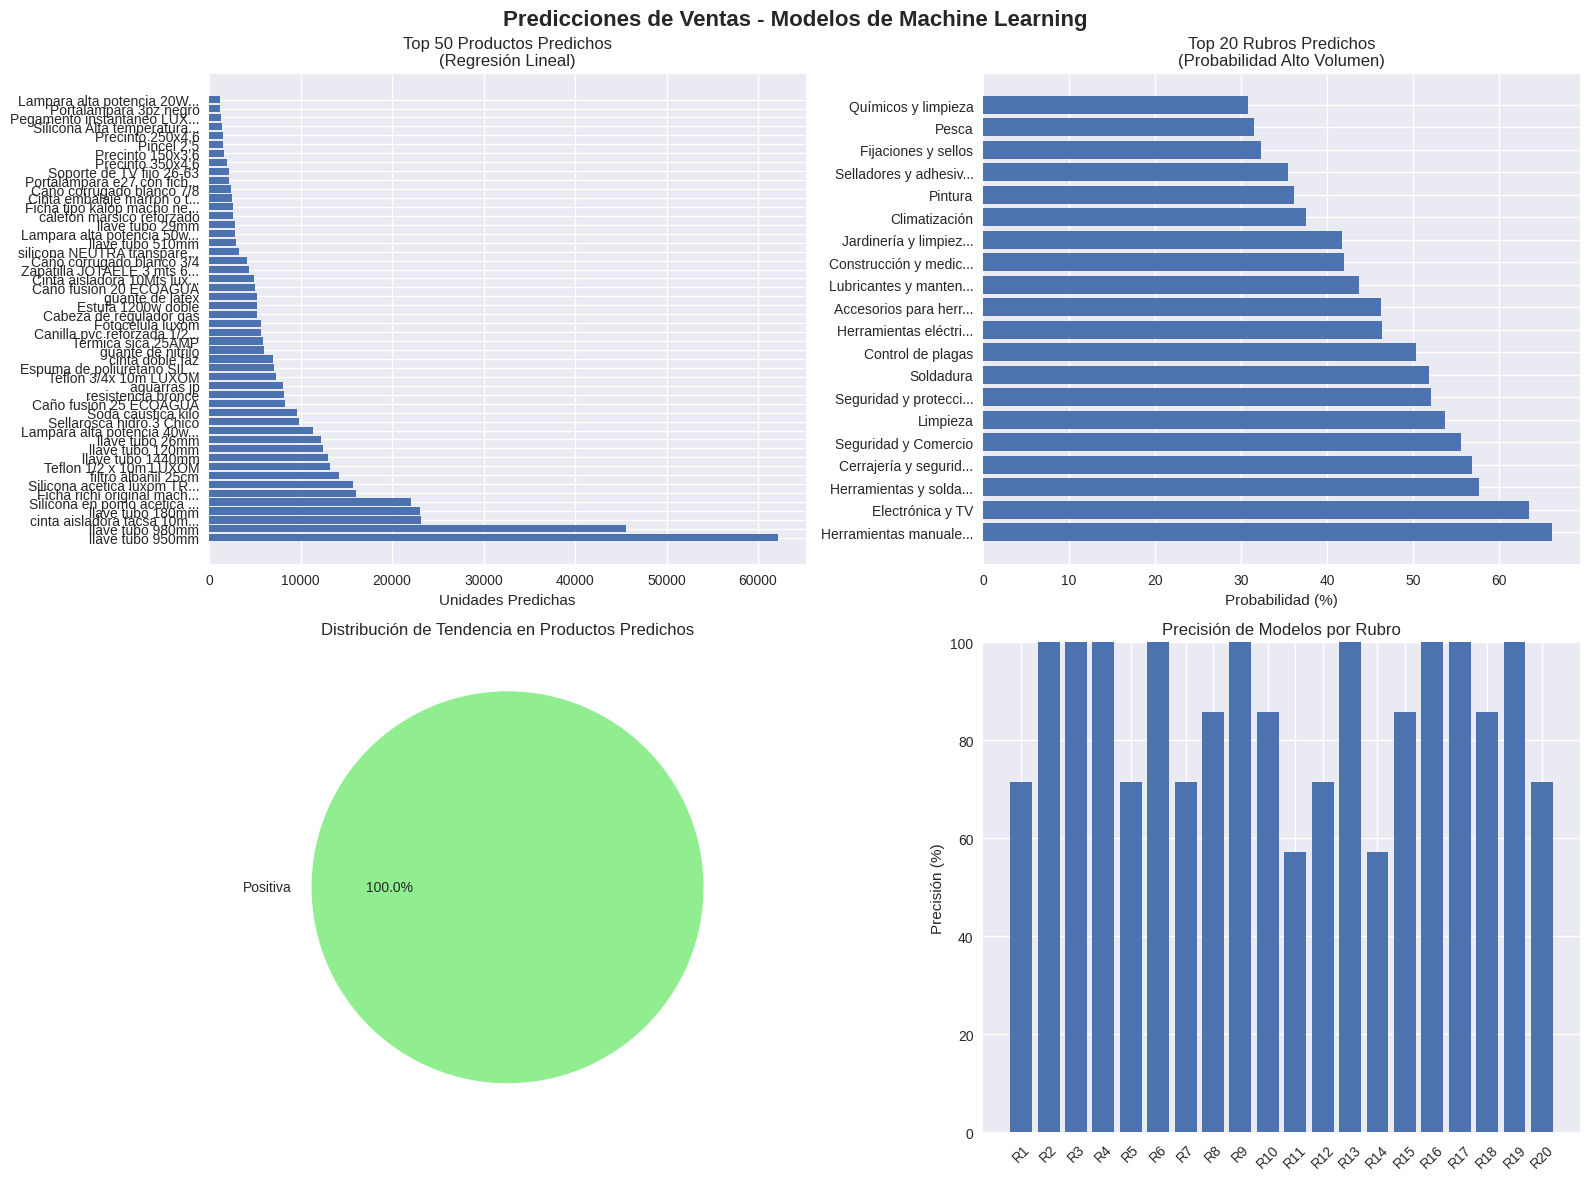


5. EXPORTANDO RESULTADOS DE PREDICCIÓN...

RESUMEN FINAL DE PREDICCIONES

📊 PREDICCIÓN PRODUCTOS (Regresión Lineal):
   • Productos analizados: 100
   • Productos predichos: 50
   • Rango de predicción: 1157 - 62127 unidades
   • Tendencia positiva: 50 productos
   • Tendencia negativa: 0 productos
   • Crecimiento promedio: 3587.2%

📊 PREDICCIÓN RUBROS (Regresión Logística):
   • Rubros analizados: 28
   • Rubros predichos: 20
   • Probabilidad promedio alto volumen: 46.6%
   • Precisión promedio del modelo: 85.7%
   • Volumen promedio por rubro: 336.4 unidades

💾 Archivos exportados:
   - prediccion_top_productos_lineal.csv
   - prediccion_top_rubros_logistica.csv
   - resumen_predicciones.txt

RECOMENDACIONES ESTRATÉGICAS DETALLADAS

🚀 TOP 5 PRODUCTOS CON MAYOR CRECIMIENTO ESPERADO:
   1. llave tubo 950mm
      • Predicción: 62127 unidades
      • Crecimiento: +24330.1%
      • Tendencia: +20680.6 unidades/mes
      • Precisión del modelo: 100.0%
   2. llave tubo 980mm
      • Pred

In [ ]:
# CONTINUACIÓN DEL CÓDIGO ANTERIOR - PREDICCIONES CON MODELOS DE MACHINE LEARNING

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*60)
print("PREDICCIONES CON MODELOS DE MACHINE LEARNING")
print("="*60)

# PREPARAR DATOS PARA PREDICCIÓN
print("\n1. PREPARANDO DATOS PARA PREDICCIÓN...")

# Crear dataset temporal para predicciones
df_prediccion = df_sin_outliers.copy()

# Agregar características temporales
df_prediccion['dia_semana'] = df_prediccion['fecha_factura'].dt.dayofweek
df_prediccion['dia_mes'] = df_prediccion['fecha_factura'].dt.day
df_prediccion['semana_año'] = df_prediccion['fecha_factura'].dt.isocalendar().week

# PREDICCIÓN 1: REGRESIÓN LINEAL PARA PRODUCTOS (20-50 productos más vendidos)
print("\n2. PREDICCIÓN CON REGRESIÓN LINEAL - TOP 20-50 PRODUCTOS")

# Obtener los productos más relevantes (top 100 para tener margen)
top_productos_prediccion = (df_prediccion.groupby('nombre_producto')['cantidad']
                           .sum()
                           .sort_values(ascending=False)
                           .head(100))

print(f"Productos considerados para predicción: {len(top_productos_prediccion)}")

# Preparar datos para cada producto
productos_predictivos = []
productos_info = []

for producto in top_productos_prediccion.index:
    # Filtrar datos del producto
    producto_data = df_prediccion[df_prediccion['nombre_producto'] == producto].copy()

    if len(producto_data) < 3:  # Mínimo de datos para predicción
        continue

    # Agrupar por mes
    producto_mensual = (producto_data.groupby('año_mes')
                      .agg({'cantidad': 'sum', 'dia_semana': 'mean',
                           'dia_mes': 'mean', 'semana_año': 'mean'})
                      .reset_index())

    if len(producto_mensual) < 2:  # Necesitamos al menos 2 puntos para regresión
        continue

    # Crear variable temporal (meses secuenciales)
    producto_mensual = producto_mensual.sort_values('año_mes')
    producto_mensual['mes_secuencial'] = range(1, len(producto_mensual) + 1)

    # Preparar características (X) y objetivo (y)
    X = producto_mensual[['mes_secuencial', 'dia_semana', 'dia_mes', 'semana_año']]
    y = producto_mensual['cantidad']

    # Entrenar modelo de regresión lineal
    try:
        modelo = LinearRegression()
        modelo.fit(X, y)

        # Predecir próximo mes
        proximo_mes = len(producto_mensual) + 1
        prediccion = modelo.predict([[proximo_mes,
                                    producto_mensual['dia_semana'].mean(),
                                    producto_mensual['dia_mes'].mean(),
                                    producto_mensual['semana_año'].mean()]])[0]

        # CONVERTIR PREDICCIÓN A ENTERO - AQUÍ ESTÁ EL CAMBIO
        prediccion_entero = int(round(max(0, prediccion)))  # Redondear y convertir a entero

        # Almacenar resultados
        productos_predictivos.append({
            'producto': producto,
            'prediccion': prediccion_entero,  # Usar valor entero
            'tendencia': round(modelo.coef_[0], 1),  # Un decimal
            'datos_historicos': len(producto_mensual),
            'venta_promedio': round(y.mean(), 1),  # Un decimal
            'r2_score': round(modelo.score(X, y), 3),  # Tres decimales para R²
            'crecimiento_porcentual': round((modelo.coef_[0] / y.mean()) * 100, 1)  # Un decimal
        })

        productos_info.append({
            'producto': producto,
            'modelo': modelo,
            'ultimo_mes': producto_mensual['mes_secuencial'].max(),
            'datos': producto_mensual
        })

    except Exception as e:
        continue

# Convertir a DataFrame y ordenar por predicción
df_prediccion_productos = pd.DataFrame(productos_predictivos)
df_prediccion_productos = df_prediccion_productos.sort_values('prediccion', ascending=False)

# Seleccionar entre 20 y 50 productos mejor predichos
n_productos = min(50, max(20, len(df_prediccion_productos)))
top_productos_predichos = df_prediccion_productos.head(n_productos)

print(f"\nTOP {n_productos} PRODUCTOS PREDICHOS (Regresión Lineal):")
print("-" * 90)
for i, (_, row) in enumerate(top_productos_predichos.iterrows(), 1):
    tendencia = "📈" if row['tendencia'] > 0 else "📉"
    crecimiento = f"+{row['crecimiento_porcentual']}%" if row['crecimiento_porcentual'] > 0 else f"{row['crecimiento_porcentual']}%"
    print(f"{i:2d}. {row['producto'][:35]:35} "
          f"Pred: {row['prediccion']:4d}u "
          f"Prom: {row['venta_promedio']:5.1f}u "
          f"Tend: {tendencia} {row['tendencia']:5.1f} "
          f"Crec: {crecimiento:>6}")

# PREDICCIÓN 2: REGRESIÓN LOGÍSTICA PARA RUBROS (TOP 20 rubros)
print("\n3. PREDICCIÓN CON REGRESIÓN LOGÍSTICA - TOP 20 RUBROS")

# Obtener los rubros más relevantes
top_rubros_prediccion = (df_prediccion.groupby('rubro')['cantidad']
                        .sum()
                        .sort_values(ascending=False)
                        .head(30))

print(f"Rubros considerados para predicción: {len(top_rubros_prediccion)}")

# Preparar datos para clasificación binaria (1=alto volumen, 0=bajo volumen)
umbral_alto_volumen = df_prediccion.groupby('rubro')['cantidad'].sum().quantile(0.7)

rubros_predictivos = []
rubros_info = []

for rubro in top_rubros_prediccion.index:
    # Filtrar datos del rubro
    rubro_data = df_prediccion[df_prediccion['rubro'] == rubro].copy()

    if len(rubro_data) < 10:  # Mínimo de datos para predicción
        continue

    # Agrupar por mes
    rubro_mensual = (rubro_data.groupby('año_mes')
                    .agg({'cantidad': 'sum', 'dia_semana': 'mean',
                         'dia_mes': 'mean', 'semana_año': 'mean',
                         'numero_factura': 'nunique'})
                    .reset_index())

    if len(rubro_mensual) < 3:  # Necesitamos suficientes puntos
        continue

    # Crear variable temporal y características
    rubro_mensual = rubro_mensual.sort_values('año_mes')
    rubro_mensual['mes_secuencial'] = range(1, len(rubro_mensual) + 1)

    # Crear variable objetivo binaria (1 si está en top, 0 si no)
    rubro_mensual['es_alto_volumen'] = (rubro_mensual['cantidad'] >
                                       rubro_mensual['cantidad'].median()).astype(int)

    # Preparar características
    X = rubro_mensual[['mes_secuencial', 'dia_semana', 'dia_mes',
                      'semana_año', 'numero_factura']]
    y = rubro_mensual['es_alto_volumen']

    # Entrenar modelo de regresión logística
    try:
        # Escalar características para regresión logística
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        modelo_logistico = LogisticRegression(random_state=42)
        modelo_logistico.fit(X_scaled, y)

        # Predecir probabilidad para próximo mes
        proximo_mes = len(rubro_mensual) + 1
        prediccion_proba = modelo_logistico.predict_proba(
            scaler.transform([[proximo_mes,
                             rubro_mensual['dia_semana'].mean(),
                             rubro_mensual['dia_mes'].mean(),
                             rubro_mensual['semana_año'].mean(),
                             rubro_mensual['numero_factura'].mean()]])
        )[0][1]  # Probabilidad de clase 1 (alto volumen)

        # Calcer métricas adicionales
        precision = modelo_logistico.score(X_scaled, y)
        volumen_promedio = rubro_mensual['cantidad'].mean()

        # Almacenar resultados - CONVERTIR A UN DECIMAL DONDE SEA APROPIADO
        rubros_predictivos.append({
            'rubro': rubro,
            'probabilidad_alto_volumen': round(prediccion_proba, 3),
            'precision_modelo': round(precision, 3),
            'datos_historicos': len(rubro_mensual),
            'volumen_promedio': round(volumen_promedio, 1),
            'facturas_promedio': round(rubro_mensual['numero_factura'].mean(), 1),
            'confiabilidad': round(min(prediccion_proba, precision) * 100, 1)
        })

    except Exception as e:
        continue

# Convertir a DataFrame y ordenar por probabilidad
df_prediccion_rubros = pd.DataFrame(rubros_predictivos)
df_prediccion_rubros = df_prediccion_rubros.sort_values('probabilidad_alto_volumen', ascending=False)

# Seleccionar top 20 rubros
n_rubros = min(20, len(df_prediccion_rubros))
top_rubros_predichos = df_prediccion_rubros.head(n_rubros)

print(f"\nTOP {n_rubros} RUBROS PREDICHOS (Regresión Logística):")
print("-" * 90)
for i, (_, row) in enumerate(top_rubros_predichos.iterrows(), 1):
    probabilidad = row['probabilidad_alto_volumen'] * 100
    confiabilidad = row['confiabilidad']
    print(f"{i:2d}. {row['rubro'][:30]:30} "
          f"Prob: {probabilidad:5.1f}% "
          f"Prec: {row['precision_modelo']*100:5.1f}% "
          f"Vol: {row['volumen_promedio']:6.1f}u "
          f"Conf: {confiabilidad:4.1f}%")

# VISUALIZACIONES DE PREDICCIONES
print("\n4. CREANDO VISUALIZACIONES DE PREDICCIONES...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Predicciones de Ventas - Modelos de Machine Learning',
             fontsize=16, fontweight='bold')

# 1. Top productos predichos (Regresión Lineal)
axes[0, 0].barh(range(len(top_productos_predichos)),
                top_productos_predichos['prediccion'].values)
axes[0, 0].set_yticks(range(len(top_productos_predichos)))
axes[0, 0].set_yticklabels([label[:25] + '...' if len(label) > 25 else label
                           for label in top_productos_predichos['producto']])
axes[0, 0].set_title(f'Top {n_productos} Productos Predichos\n(Regresión Lineal)')
axes[0, 0].set_xlabel('Unidades Predichas')

# 2. Probabilidades de rubros (Regresión Logística)
axes[0, 1].barh(range(len(top_rubros_predichos)),
                top_rubros_predichos['probabilidad_alto_volumen'].values * 100)
axes[0, 1].set_yticks(range(len(top_rubros_predichos)))
axes[0, 1].set_yticklabels([label[:20] + '...' if len(label) > 20 else label
                           for label in top_rubros_predichos['rubro']])
axes[0, 1].set_title('Top 20 Rubros Predichos\n(Probabilidad Alto Volumen)')
axes[0, 1].set_xlabel('Probabilidad (%)')

# 3. Tendencia de productos (positiva/negativa)
tendencias = top_productos_predichos['tendencia'].apply(
    lambda x: 'Positiva' if x > 0 else 'Negativa')
tendencia_counts = tendencias.value_counts()
axes[1, 0].pie(tendencia_counts.values, labels=tendencia_counts.index,
               autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Distribución de Tendencia en Productos Predichos')

# 4. Precisión de modelos por rubro
precision_rubros = top_rubros_predichos['precision_modelo'] * 100
axes[1, 1].bar(range(len(precision_rubros)), precision_rubros.values)
axes[1, 1].set_xticks(range(len(precision_rubros)))
axes[1, 1].set_xticklabels([f"R{i+1}" for i in range(len(precision_rubros))],
                           rotation=45)
axes[1, 1].set_title('Precisión de Modelos por Rubro')
axes[1, 1].set_ylabel('Precisión (%)')
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# EXPORTAR RESULTADOS DE PREDICCIÓN
print("\n5. EXPORTANDO RESULTADOS DE PREDICCIÓN...")

# Exportar predicciones de productos (ya son enteros)
top_productos_predichos_exportar = top_productos_predichos.copy()
# Asegurar un decimal en las columnas numéricas
for col in ['tendencia', 'venta_promedio', 'crecimiento_porcentual']:
    top_productos_predichos_exportar[col] = top_productos_predichos_exportar[col].round(1)
top_productos_predichos_exportar.to_csv('prediccion_top_productos_lineal.csv', index=False)

# Exportar predicciones de rubros
top_rubros_predichos_exportar = top_rubros_predichos.copy()
for col in ['probabilidad_alto_volumen', 'precision_modelo', 'volumen_promedio', 'facturas_promedio', 'confiabilidad']:
    top_rubros_predichos_exportar[col] = top_rubros_predichos_exportar[col].round(3)
top_rubros_predichos_exportar.to_csv('prediccion_top_rubros_logistica.csv', index=False)

# RESUMEN FINAL DE PREDICCIONES
print("\n" + "="*60)
print("RESUMEN FINAL DE PREDICCIONES")
print("="*60)

# Crear contenido para el archivo TXT
resumen_txt_content = []
resumen_txt_content.append("=" * 60)
resumen_txt_content.append("RESUMEN FINAL DE PREDICCIONES")
resumen_txt_content.append("=" * 60)
resumen_txt_content.append("")

resumen_txt_content.append("📊 PREDICCIÓN PRODUCTOS (Regresión Lineal):")
resumen_txt_content.append(f"   • Productos analizados: {len(productos_predictivos)}")
resumen_txt_content.append(f"   • Productos predichos: {len(top_productos_predichos)}")
resumen_txt_content.append(f"   • Rango de predicción: {top_productos_predichos['prediccion'].min():d} - {top_productos_predichos['prediccion'].max():d} unidades")
resumen_txt_content.append(f"   • Tendencia positiva: {(top_productos_predichos['tendencia'] > 0).sum()} productos")
resumen_txt_content.append(f"   • Tendencia negativa: {(top_productos_predichos['tendencia'] <= 0).sum()} productos")
resumen_txt_content.append(f"   • Crecimiento promedio: {top_productos_predichos['crecimiento_porcentual'].mean():.1f}%")
resumen_txt_content.append("")

resumen_txt_content.append("📊 PREDICCIÓN RUBROS (Regresión Logística):")
resumen_txt_content.append(f"   • Rubros analizados: {len(rubros_predictivos)}")
resumen_txt_content.append(f"   • Rubros predichos: {len(top_rubros_predichos)}")
resumen_txt_content.append(f"   • Probabilidad promedio alto volumen: {top_rubros_predichos['probabilidad_alto_volumen'].mean()*100:.1f}%")
resumen_txt_content.append(f"   • Precisión promedio del modelo: {top_rubros_predichos['precision_modelo'].mean()*100:.1f}%")
resumen_txt_content.append(f"   • Volumen promedio por rubro: {top_rubros_predichos['volumen_promedio'].mean():.1f} unidades")
resumen_txt_content.append("")

resumen_txt_content.append("💾 ARCHIVOS EXPORTADOS:")
resumen_txt_content.append("   - prediccion_top_productos_lineal.csv")
resumen_txt_content.append("   - prediccion_top_rubros_logistica.csv")
resumen_txt_content.append("   - resumen_predicciones.txt")
resumen_txt_content.append("")

# También mostrar en consola
print(f"\n📊 PREDICCIÓN PRODUCTOS (Regresión Lineal):")
print(f"   • Productos analizados: {len(productos_predictivos)}")
print(f"   • Productos predichos: {len(top_productos_predichos)}")
print(f"   • Rango de predicción: {top_productos_predichos['prediccion'].min():d} - {top_productos_predichos['prediccion'].max():d} unidades")
print(f"   • Tendencia positiva: {(top_productos_predichos['tendencia'] > 0).sum()} productos")
print(f"   • Tendencia negativa: {(top_productos_predichos['tendencia'] <= 0).sum()} productos")
print(f"   • Crecimiento promedio: {top_productos_predichos['crecimiento_porcentual'].mean():.1f}%")

print(f"\n📊 PREDICCIÓN RUBROS (Regresión Logística):")
print(f"   • Rubros analizados: {len(rubros_predictivos)}")
print(f"   • Rubros predichos: {len(top_rubros_predichos)}")
print(f"   • Probabilidad promedio alto volumen: {top_rubros_predichos['probabilidad_alto_volumen'].mean()*100:.1f}%")
print(f"   • Precisión promedio del modelo: {top_rubros_predichos['precision_modelo'].mean()*100:.1f}%")
print(f"   • Volumen promedio por rubro: {top_rubros_predichos['volumen_promedio'].mean():.1f} unidades")

print(f"\n💾 Archivos exportados:")
print("   - prediccion_top_productos_lineal.csv")
print("   - prediccion_top_rubros_logistica.csv")
print("   - resumen_predicciones.txt")

# RECOMENDACIONES BASADAS EN PREDICCIONES
print("\n" + "="*60)
print("RECOMENDACIONES ESTRATÉGICAS DETALLADAS")
print("="*60)

# Agregar recomendaciones al archivo TXT
resumen_txt_content.append("=" * 60)
resumen_txt_content.append("RECOMENDACIONES ESTRATÉGICAS DETALLADAS")
resumen_txt_content.append("=" * 60)
resumen_txt_content.append("")

# 1. Productos con mayor crecimiento esperado
productos_crecimiento = top_productos_predichos[top_productos_predichos['tendencia'] > 0].head(5)
if not productos_crecimiento.empty:
    resumen_txt_content.append("🚀 TOP 5 PRODUCTOS CON MAYOR CRECIMIENTO ESPERADO:")
    print("\n🚀 TOP 5 PRODUCTOS CON MAYOR CRECIMIENTO ESPERADO:")
    for i, (_, row) in enumerate(productos_crecimiento.iterrows(), 1):
        resumen_txt_content.append(f"   {i}. {row['producto']}")
        resumen_txt_content.append(f"      • Predicción: {row['prediccion']} unidades")
        resumen_txt_content.append(f"      • Crecimiento: +{row['crecimiento_porcentual']}%")
        resumen_txt_content.append(f"      • Tendencia: +{row['tendencia']:.1f} unidades/mes")
        resumen_txt_content.append(f"      • Precisión del modelo: {row['r2_score']*100:.1f}%")
        resumen_txt_content.append("")

        print(f"   {i}. {row['producto']}")
        print(f"      • Predicción: {row['prediccion']} unidades")
        print(f"      • Crecimiento: +{row['crecimiento_porcentual']}%")
        print(f"      • Tendencia: +{row['tendencia']:.1f} unidades/mes")
        print(f"      • Precisión del modelo: {row['r2_score']*100:.1f}%")

# 2. Productos con mayor volumen predicho
productos_volumen = top_productos_predichos.head(3)
if not productos_volumen.empty:
    resumen_txt_content.append("💰 TOP 3 PRODUCTOS CON MAYOR VOLUMEN PREDICHO:")
    print("\n💰 TOP 3 PRODUCTOS CON MAYOR VOLUMEN PREDICHO:")
    for i, (_, row) in enumerate(productos_volumen.iterrows(), 1):
        incremento = ((row['prediccion'] - row['venta_promedio']) / row['venta_promedio'] * 100) if row['venta_promedio'] > 0 else 0
        resumen_txt_content.append(f"   {i}. {row['producto']}")
        resumen_txt_content.append(f"      • Volumen predicho: {row['prediccion']} unidades")
        resumen_txt_content.append(f"      • Volumen histórico: {row['venta_promedio']:.1f} unidades/mes")
        resumen_txt_content.append(f"      • Incremento esperado: {incremento:.1f}%")
        resumen_txt_content.append("")

        print(f"   {i}. {row['producto']}")
        print(f"      • Volumen predicho: {row['prediccion']} unidades")
        print(f"      • Volumen histórico: {row['venta_promedio']:.1f} unidades/mes")
        print(f"      • Incremento esperado: {incremento:.1f}%")

# 3. Rubros con mayor probabilidad de alto volumen
rubros_alto_volumen = top_rubros_predichos.head(3)
if not rubros_alto_volumen.empty:
    resumen_txt_content.append("📈 TOP 3 RUBROS CON MAYOR POTENCIAL:")
    print("\n📈 TOP 3 RUBROS CON MAYOR POTENCIAL:")
    for i, (_, row) in enumerate(rubros_alto_volumen.iterrows(), 1):
        resumen_txt_content.append(f"   {i}. {row['rubro']}")
        resumen_txt_content.append(f"      • Probabilidad alto volumen: {row['probabilidad_alto_volumen']*100:.1f}%")
        resumen_txt_content.append(f"      • Precisión del modelo: {row['precision_modelo']*100:.1f}%")
        resumen_txt_content.append(f"      • Volumen promedio: {row['volumen_promedio']:.1f} unidades/mes")
        resumen_txt_content.append(f"      • Facturas promedio: {row['facturas_promedio']:.1f} facturas/mes")
        resumen_txt_content.append("")

        print(f"   {i}. {row['rubro']}")
        print(f"      • Probabilidad alto volumen: {row['probabilidad_alto_volumen']*100:.1f}%")
        print(f"      • Precisión del modelo: {row['precision_modelo']*100:.1f}%")
        print(f"      • Volumen promedio: {row['volumen_promedio']:.1f} unidades/mes")
        print(f"      • Facturas promedio: {row['facturas_promedio']:.1f} facturas/mes")

# 4. Productos con tendencia negativa (alertas)
productos_alerta = top_productos_predichos[top_productos_predichos['tendencia'] < 0].head(3)
if not productos_alerta.empty:
    resumen_txt_content.append("⚠️  PRODUCTOS QUE REQUIEREN ATENCIÓN (Tendencia Negativa):")
    print("\n⚠️  PRODUCTOS QUE REQUIEREN ATENCIÓN (Tendencia Negativa):")
    for i, (_, row) in enumerate(productos_alerta.iterrows(), 1):
        resumen_txt_content.append(f"   {i}. {row['producto']}")
        resumen_txt_content.append(f"      • Tendencia actual: {row['tendencia']:.1f} unidades/mes")
        resumen_txt_content.append(f"      • Disminución: {row['crecimiento_porcentual']}%")
        resumen_txt_content.append(f"      • Volumen histórico: {row['venta_promedio']:.1f} unidades/mes")
        resumen_txt_content.append("")

        print(f"   {i}. {row['producto']}")
        print(f"      • Tendencia actual: {row['tendencia']:.1f} unidades/mes")
        print(f"      • Disminución: {row['crecimiento_porcentual']}%")
        print(f"      • Volumen histórico: {row['venta_promedio']:.1f} unidades/mes")

# 5. Recomendaciones generales
resumen_txt_content.append("🎯 RECOMENDACIONES GENERALES:")
resumen_txt_content.append(f"   • Enfocar inventario en los {len(productos_crecimiento)} productos con tendencia positiva")
resumen_txt_content.append(f"   • Monitorear de cerca los {len(productos_alerta)} productos con tendencia negativa")
resumen_txt_content.append(f"   • Priorizar los {len(rubros_alto_volumen)} rubros con mayor probabilidad de alto volumen")
resumen_txt_content.append(f"   • Revisar estrategia para rubros con probabilidad menor al 60%")
resumen_txt_content.append("")

print("\n🎯 RECOMENDACIONES GENERALES:")
print(f"   • Enfocar inventario en los {len(productos_crecimiento)} productos con tendencia positiva")
print(f"   • Monitorear de cerca los {len(productos_alerta)} productos con tendencia negativa")
print(f"   • Priorizar los {len(rubros_alto_volumen)} rubros con mayor probabilidad de alto volumen")
print(f"   • Revisar estrategia para rubros con probabilidad menor al 60%")

# 6. Métricas de confianza del modelo
precision_promedio_productos = top_productos_predichos['r2_score'].mean() * 100
confiabilidad_promedio_rubros = top_rubros_predichos['confiabilidad'].mean()

resumen_txt_content.append("🔬 MÉTRICAS DE CONFIANZA DE LOS MODELOS:")
resumen_txt_content.append(f"   • Precisión promedio modelos productos: {precision_promedio_productos:.1f}%")
resumen_txt_content.append(f"   • Confiabilidad promedio modelos rubros: {confiabilidad_promedio_rubros:.1f}%")
resumen_txt_content.append(f"   • Productos con R² > 0.7: {(top_productos_predichos['r2_score'] > 0.7).sum()}")
resumen_txt_content.append(f"   • Rubros con confiabilidad > 70%: {(top_rubros_predichos['confiabilidad'] > 70).sum()}")
resumen_txt_content.append("")
resumen_txt_content.append("✅ Análisis predictivo completado exitosamente!")

print(f"\n🔬 MÉTRICAS DE CONFIANZA DE LOS MODELOS:")
print(f"   • Precisión promedio modelos productos: {precision_promedio_productos:.1f}%")
print(f"   • Confiabilidad promedio modelos rubros: {confiabilidad_promedio_rubros:.1f}%")
print(f"   • Productos con R² > 0.7: {(top_productos_predichos['r2_score'] > 0.7).sum()}")
print(f"   • Rubros con confiabilidad > 70%: {(top_rubros_predichos['confiabilidad'] > 70).sum()}")

# EXPORTAR RESUMEN A TXT
with open('resumen_predicciones.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(resumen_txt_content))

print(f"\n💾 Resumen exportado a: resumen_predicciones.txt")
print("\n✅ Análisis predictivo completado exitosamente!")

hacer grafico de la prediccion de productos top lineal


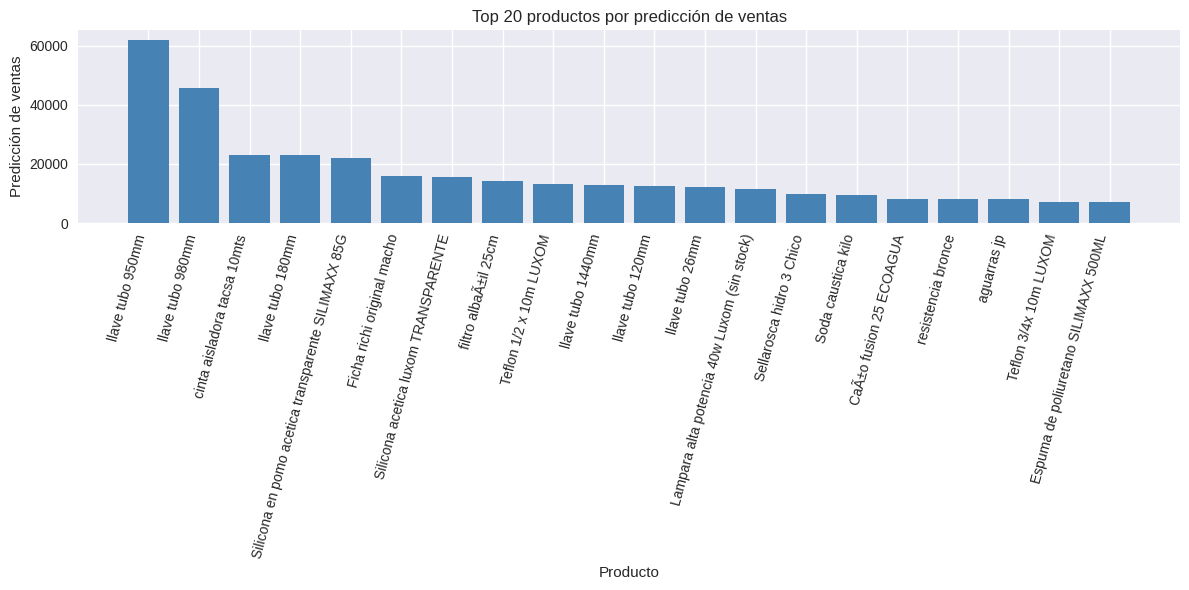

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =====================
# 📂 Cargar archivo CSV
# =====================
file_path = "prediccion_top_productos_lineal.csv"  # <-- cambia por tu ruta

# Leer el archivo
df = pd.read_csv(file_path, encoding="latin1")

# =====================
# 📊 Top 20 productos
# =====================
top20 = df.nlargest(20, "prediccion")

plt.figure(figsize=(12, 6))
plt.bar(top20["producto"], top20["prediccion"], color="steelblue")
plt.xticks(rotation=75, ha="right")
plt.title("Top 20 productos por predicción de ventas")
plt.xlabel("Producto")
plt.ylabel("Predicción de ventas")
plt.tight_layout()
plt.show()


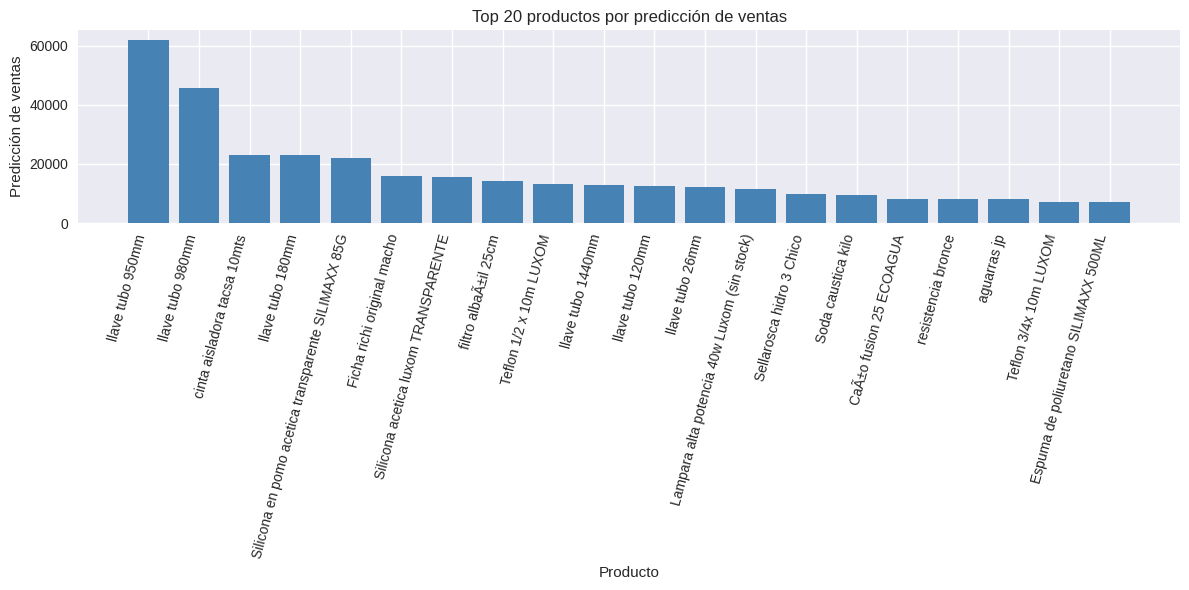

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# =====================
# 📂 Cargar archivo CSV
# =====================
file_path = "prediccion_top_productos_lineal.csv"  # <-- cambia por tu ruta

# Leer el archivo
df = pd.read_csv(file_path, encoding="latin1")

# =====================
# 📊 Top 20 productos
# =====================
top20 = df.nlargest(20, "prediccion")

plt.figure(figsize=(12, 6))
plt.bar(top20["producto"], top20["prediccion"], color="steelblue")
plt.xticks(rotation=75, ha="right")
plt.title("Top 20 productos por predicción de ventas")
plt.xlabel("Producto")
plt.ylabel("Predicción de ventas")
plt.tight_layout()
plt.show()
